### Polecenie
Znaleźć top 10 krajów z najmniejszą dzienną śmiertelnością w Ameryce Południowej we w całym Wrześniu 2020.

    location  total_deaths
0     Guyana          39.0
1    Uruguay          44.0
2   Suriname          71.0
3   Paraguay         326.0
4  Venezuela         381.0
5    Bolivia        5027.0
6    Ecuador        6556.0
7  Argentina        8498.0
8      Chile       11289.0
9   Colombia       19663.0


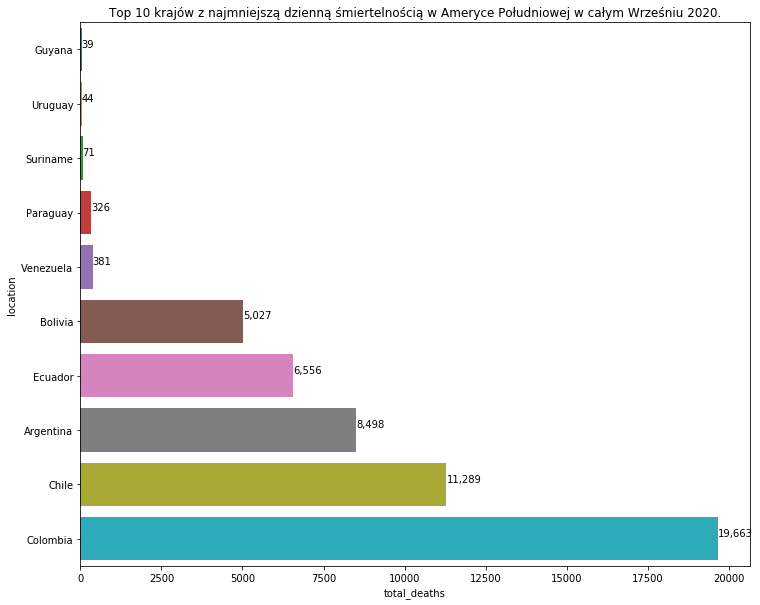

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv("C:\\Users\\PC COMPUTER\\Desktop\\Programowanie funkcyjne\\Laboratoria\\Lab4\\lab4\\covid_data.csv", delimiter=',', usecols=["continent", "location", "date", "total_deaths"], header=0)
data = data.dropna()
data = data[data.continent.str.contains('South America',case=False)]
data['date'] = pd.to_datetime(data['date'])
data['period'] = data['date'].dt.month
data = data.loc[(data['period']==9)]
data = data.sort_values(['total_deaths'], ascending=True).reset_index(drop=True)
data = data.groupby(by=['location'])['total_deaths'].min().sort_values().reset_index()
data = data.head(10)
print(data)

plt.figure(figsize=(12,10))
plt.title('Top 10 krajów z najmniejszą dzienną śmiertelnością w Ameryce Południowej w całym Wrześniu 2020.')
plot = sns.barplot(data['total_deaths'], data['location'])
for i,(value,name) in enumerate(zip(data['total_deaths'],data['location'])):
    plot.text(value,i-0.05,f'{value:,.0f}',size=10)
plt.show()


---

### Polecenie
Przygotować mapę, w której kluczem jest nazwa kontynentu a wartość to kraj z: największym wzrostem nowych zachorowań na milion mieszkańców.


In [52]:
import pandas as pd
import plotly.express as px
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

init_notebook_mode(connected=True)

data = pd.read_csv("C:\\Users\\PC COMPUTER\\Desktop\\WAT\\Semestr 5\\Programowanie funkcyjne\\Laboratoria\\Lab4\\lab4\\covid_data.csv", delimiter=',', usecols=["continent", "location", "new_cases_per_million"], header=0)
# print(data.head(15))

data = data.sort_values('new_cases_per_million').groupby(['continent', 'location']).max(level='new_cases_per_million')

result = data.groupby(['continent']).idxmax()['new_cases_per_million']

countryDict = {row[0]: row[1] for row in result.values}
# print(countryDict)

plotResult = pd.DataFrame
plotResult = plotResult(countryDict.items())
plotResult['location'] = plotResult.iloc[:, 1]


fig = px.choropleth(data_frame=plotResult,
                    locations='location',
                    locationmode='country names',
                    color='location',
                    hover_data=['location'],
                    labels={'Rozpatrywany kraj': ''},
                    title='Kraje z największym wzrostem nowych zachorowań na million mieszkańców na poszczególnych kontynentach',
                    color_continuous_scale='turbo')

fig.show()

---

### Polecenie
Znaleźć top 5 państw w Ameryce Południowej, które miały największy dzienny wzrost zachorowań na milion mieszkańców od Kwietnia do Września, liczony jako różnica średnich miesięcznych.


   index   location  new_cases_per_million
0      0  Argentina             244.907967
1      4   Colombia             138.023433
2      9       Peru             133.064000
3      2     Brazil             131.983200
4      8   Paraguay             106.189633


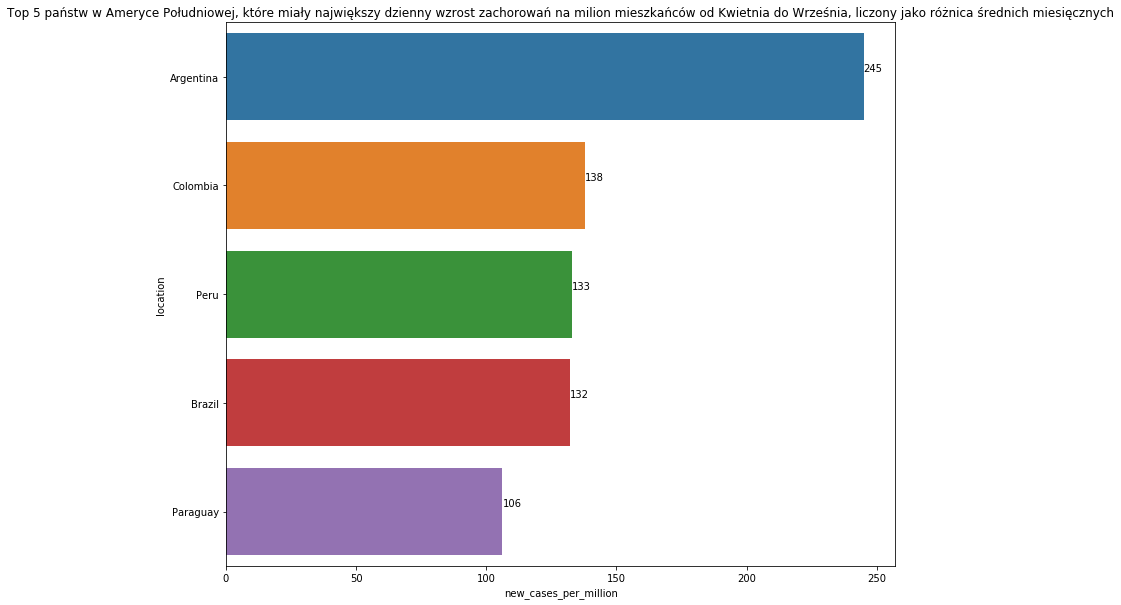

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv("C:\\Users\\PC COMPUTER\\Desktop\\Programowanie funkcyjne\\Laboratoria\\Lab4\\lab4\\covid_data.csv", delimiter=',', usecols=["continent", "location", "date", "new_cases_per_million"], header=0)
data = data.dropna()
data = data[data.continent.str.contains('South America',case=False)]
data['date'] = pd.to_datetime(data['date'])
data['period'] = data['date'].dt.month
data = data.loc[(data['period']==4) | (data['period']==9)]
data = data.groupby(['location', 'period']).mean()

data = data.reset_index()[['location', 'period', 'new_cases_per_million']]
result = data.groupby('location').last()['new_cases_per_million'] - data.groupby('location').first()['new_cases_per_million']
# result = result.nlargest(5)
result = result.reset_index()

result = result.sort_values(by=['new_cases_per_million'], ascending=False).reset_index()
result = result.head(5)
print(result)





plt.figure(figsize=(12,10))
plt.title('Top 5 państw w Ameryce Południowej, które miały największy dzienny wzrost zachorowań na milion mieszkańców od Kwietnia do Września, liczony jako różnica średnich miesięcznych')
plot = sns.barplot(result['new_cases_per_million'], result['location'])
for i,(value,name) in enumerate(zip(result['new_cases_per_million'],result['location'])):
    plot.text(value,i-0.05,f'{value:,.0f}',size=10)
plt.show()
